In [1]:
!pip install simpletransformers

     |████████████████████████████████| 102kB 3.2MB/s 
     |████████████████████████████████| 696kB 8.4MB/s 
     |████████████████████████████████| 389kB 67.0MB/s 
     |████████████████████████████████| 194kB 56.1MB/s 
     |████████████████████████████████| 860kB 51.2MB/s 
     |████████████████████████████████| 1.0MB 66.9MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=8661116092e85ff9ad9c797f35bf43123f863dc97f3c42aef0b016475c636e13
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=ab2fc21a130c8bcedff259a5b0dbbe0826f2978a1473d01917057c777bc448f9
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built seqeval sacremoses


In [2]:
import sys
from google.colab import drive
sys.path.insert(1, '/content/drive/My Drive/Colab Notebooks')
drive.mount('/content/drive')
dataset_dir = "/content/drive/My Drive/allCategories/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from tqdm import tqdm_notebook
category =['ArtFashionFoodAndWine',
'BlogsOpEdsObits','BooksAndMagazines',
'BusinessAndFinance',
'DomesticAndCulture',
'International',
'Lifestyle',
'News',
'ScienceEdAutosAndTech',
'ShowsMoviesGamesAndEntertainment',
'Sports']
prefix =category[0]

In [0]:
def load_train():
    #load train data
    train_df = pd.read_csv(dataset_dir+ prefix+'_train.csv', header=None)
    train_df.columns = ['label', 'text']
    train_df = train_df[['text', 'label']]
    train_df['text'] = train_df['text'].astype(str)
    train_df['label'] = train_df['label'].astype(int)
    return train_df
   
      

In [0]:
def load_test():
    #load test data
    eval_df = pd.read_csv(dataset_dir+prefix+'_test.csv', header=None)
    eval_df.columns = ['label', 'text']
    eval_df = eval_df[['text', 'label']]
    eval_df['text'] = eval_df['text'].astype(str)
    eval_df['label'] = eval_df['label'].astype(int)
    return eval_df

In [0]:
def format_correct(train_df,eval_df):
    def myfunc(x):
        if x ==0 or x==1:
          return x
        else:
          return x-6
    eval_df['label'] = eval_df['label'].apply(myfunc)
    train_df['label'] = train_df['label'].apply(myfunc)


In [0]:
def info(train_df,eval_df):
    print(train_df['label'].describe())
    print(eval_df['label'].describe())

In [94]:
# Create a ClassificationModel
from simpletransformers.classification import ClassificationModel
for i in range(0,2):
      print("STARTING....",i)
      prefix = category[i]
      train_df=load_train()
      eval_df= load_test()
      format_correct(train_df,eval_df)
      #info(train_df,eval_df)
      model = ClassificationModel('bert', 'bert-base-cased',use_cuda=True, num_labels=4, args={'reprocess_input_data': True, 'overwrite_output_dir': True,  'fp16': False}) 
      # Train the model
      model.train_model(train_df,output_dir=dataset_dir+prefix+'_output/')
      result, model_outputs, wrong_predictions = model.eval_model(eval_df)
      predictions, raw_outputs = model.predict(eval_df['text'])
      np.save(dataset_dir+prefix+"_output/savenp_preds.npy",predictions)
      np.save(dataset_dir+prefix+"_output/savenp_raw.npy",eval_df['label'])

STARTING.... 0
Converting to features started.


Running loss: 0.776996Training of bert model complete. Saved to /content/drive/My Drive/allCategories/ArtFashionFoodAndWine_output/.
Converting to features started.


Converting to features started.


STARTING.... 1
Converting to features started.


Running loss: 0.151399Training of bert model complete. Saved to /content/drive/My Drive/allCategories/BlogsOpEdsObits_output/.
Converting to features started.


Converting to features started.


Converting to features started.


Running loss: 0.026664
Training of bert model complete. Saved to /content/drive/My Drive/585_dataset/saurabh_data/output/.


In [0]:
############################LOAD MODEL#####################################################
from simpletransformers.classification import ClassificationModel
model_path = dataset_dir+prefix+'_output'+'/'#+'pytorch_model.bin'
#ClassificationModel('bert', 'bert-base-cased',use_cuda=True, num_labels=6, args={'reprocess_input_data': True, 'overwrite_output_dir': True,  'fp16': False}) 
model = ClassificationModel('bert',model_path)

In [0]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

Converting to features started.


In [0]:
print(result)
#print(model_outputs)
print(len(wrong_predictions))

{'mcc': 0.6174416601893189, 'eval_loss': 0.6150144949555397}
847


In [0]:
predictions, raw_outputs = model.predict(eval_df['text'])

Converting to features started.


In [0]:
#from tempfile import TemporaryFile
import numpy as np


np.save(dataset_dir+prefix+"_output/savenp_preds.npy",predictions)
np.save(dataset_dir+prefix+"_output/savenp_raw.npy",eval_df['label'])

In [0]:
import numpy as np
preds = np.load(dataset_dir+prefix+"_output/savenp_preds.npy")
raw = np.load(dataset_dir+prefix+"_output/savenp_raw.npy")

In [11]:
print("preds :",preds.shape)

preds : (73529,)


In [23]:
np.sum(preds==raw)/len(preds)

0.8030436970447035

In [13]:

result = {}
percent = np.zeros(shape=(6))
print("pred shape:",preds.shape[0]," preds:",preds.shape)
print("overall accuracy:",np.sum(eval_df['label']==preds)/preds.shape[0])
for i in range(0,6):
    result[i] = np.where(eval_df['label'] == i)
    print("correct prediction:",np.sum(preds[result[i]]==i)," total examples:",len(preds[result[i]]))
    print((np.sum(preds[result[i]]==i)*100)/len(preds[result[i]]))
    percent[i] =(np.sum(preds[result[i]]==i)*100)/len(preds[result[i]])

pred shape: 73529  preds: (73529,)
overall accuracy: 0.8030436970447035
correct prediction: 7070  total examples: 12131
58.280438545874205
correct prediction: 9318  total examples: 10424
89.38986953184958
correct prediction: 11057  total examples: 12036
91.86606846128282
correct prediction: 12840  total examples: 13692
93.77738825591587
correct prediction: 10942  total examples: 13305
82.23975948891395
correct prediction: 7820  total examples: 11941
65.48865254166317


In [0]:
v_00 = percent[0]
v_01 = percent[1]
for i in range(2,6):
    percent[i-2] = percent[i]

percent[4] = v_00
percent[5] = v_01

In [15]:

years = ["1960s","1970s","1980s","1990s","2000s","2010s"]
p_list = percent.tolist()
print(p_list)

[91.86606846128282, 93.77738825591587, 82.23975948891395, 65.48865254166317, 58.280438545874205, 89.38986953184958]


In [16]:
!pip install matplotlib

No handles with labels found to put in legend.


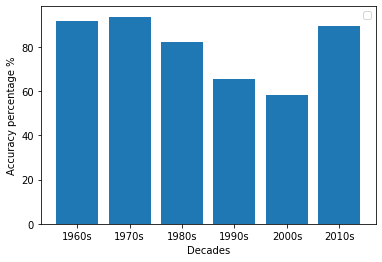

In [18]:

import matplotlib.pyplot as plt
plt.bar(years, p_list)
plt.legend()
plt.xlabel("Decades")
plt.ylabel("Accuracy percentage %")

#plt.show()
plt.savefig(dataset_dir+prefix+'_output/plot.png', dpi=800)

In [0]:
corr = np.zeros(shape=(6,6))


In [21]:

for i in range(preds.shape[0]):
          raw_t = raw[i]-2
          pred_t =preds[i]-2
          if raw_t <0:
            raw_t+=6
          if pred_t <0:
            pred_t+=6
          corr[raw_t,pred_t] +=1
print("total sum:",np.sum(corr,axis=0) )
corr /=np.sum(corr,axis=1) 

total sum: [12012. 13785. 14117. 11119. 10401. 12095.]


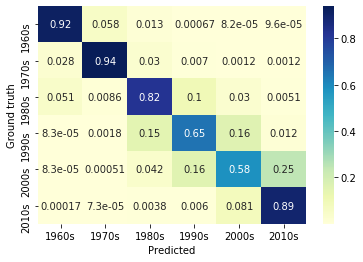

In [22]:
import seaborn as sb
heat_map = sb.heatmap(corr,cmap="YlGnBu",xticklabels=years, yticklabels=years,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Ground truth")
#plt.show()
plt.savefig(dataset_dir+prefix+'_output/heatmap.png', dpi=800)

In [0]:
eval_df['preds'] = preds
print("length:",eval_df['preds'].shape)
class0= eval_df.loc[ eval_df['label'] != eval_df['preds']]
print("length rem1:",class0['preds'].shape)
class0=class0.loc[class0['label'] == 0]
print("length rem2:",class0['preds'].shape)


length: (73511,)
length rem1: (12818,)
length rem2: (4844,)


In [0]:


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
start=660
end=661
print(class0[start:end])
print(class0['text'][start:end])
print("predicted: ",class0['preds'][start:end],"  ground truth:",class0['label'][start:end])


In [0]:
train_df_fi = train_df[train_df['text'].str.contains('Trump')] 
print(len(train_df_fi)," ",train_df_fi.describe())
print(train_df_fi['label'][0:100])

2332                label
count  2332.000000
mean   1.317324   
std    1.080457   
min    0.000000   
25%    1.000000   
50%    1.000000   
75%    1.000000   
max    5.000000   
11       1
68       0
459      1
490      4
546      0
686      1
963      1
1082     5
1311     1
1406     1
1501     1
1515     1
1544     1
1563     1
1624     5
1664     1
1727     1
1782     1
1889     1
1890     1
1898     1
2154     1
2297     1
2338     1
2377     0
2427     1
2553     1
2609     1
2665     1
3052     5
3513     1
3571     1
3711     1
3963     3
4183     1
4328     4
4475     1
4624     1
4820     1
4855     1
4916     1
5220     1
5336     1
5383     1
5458     1
5662     1
5782     1
6147     0
6165     1
6478     1
6650     0
6919     1
7120     1
7203     1
7276     1
7281     1
7300     1
7418     1
7436     1
7445     1
7483     1
7496     1
7499     1
7550     4
7689     1
7715     1
7768     1
8153     1
8168     1
8579     1
8624     1
8732     1
8956     1
8982     4
9061    

In [0]:
'So you are an Iraqi that -- you are representing the occupying forces?'' Mr. Hussein taunted the judge.''No'' the judge said ''I'm an Iraqi representing Iraq.''The judge also rebuked Mr. Hussein firmly when he referred to Kuwaitis as ''animals'' saying: ''Don't use foul language and attack. This is a legal session.'' He continued ''Anything outside of obscenity or outside of the norms of a legal session is not accepted.''Mr. Hussein responded: ''Then forgive me.''Later in the day it became clear that the judge had decided to let Mr. Hussein speak longer than the other defendants whom he cut off far more quickly. He gave Mr. Hussein some leeway as they jousted over the validity of the laws governing the proceedings -- and the judge reminded Mr. Hussein that the sections of law that require the rights of defendants to be read against them were signed by Mr. Hussein himself.''These articles were they not signed by Saddam Hussein?'' the judge asked. ''Yes this is the law that was in '73. So then Saddam Hussein was representing the leadership and signed the law. So now you are using the law that Saddam signed against Saddam. Saddam was the people.''Mr. Hussein responded that he was ''a man of law'' but protested that he was above it.''Is it allowed to call a president elected by the people and charge him according to a law that was enacted under this will and the will of the people?'' Mr. Hussein asked. ''There is some contradiction.''The judge answered: ''The president is a profession is a position is a deputy of the society. That's true. And originally inherently he's a citizen. And every citizen according to the constitution if this person violates a law has to come before the law. And that law you know more than I do.''In fact the laws under which Mr. Hussein and the others will be tried are a mix of existing Iraqi criminal law international humanitarian law and laws that predate the ascension of the Baath Party to power in 1968.
predicted as 1968's but 2000's

But committee investigators were not aware of the charts source in the half-century-old journal article a connection pointed out to The New York Times by an independent expert on interrogation who spoke on condition of anonymity.The 1957 article from which the chart was copied was entitled Communist Attempts to Elicit False Confessions From Air Force Prisoners of War and written by Albert D. Biderman a sociologist then working for the Air Force who died in 2003. Mr. Biderman had interviewed American prisoners returning from North Korea  some of whom had been filmed by their Chinese interrogators confessing to germ warfare and other atrocities.Those orchestrated confessions led to allegations that the American prisoners had been brainwashed and provoked the military to revamp its training to give some military personnel a taste of the enemies harsh methods to inoculate them against quick capitulation if captured.In 2002 the training program known as SERE for Survival Evasion Resistance Escape became a source of interrogation methods both for the C.I.A. and the military. In what critics describe as a remarkable case of historical amnesia  officials who drew on the SERE program appear to have been unaware that it had been created as a result of concern about false confessions by American prisoners.Senator Carl Levin  Democrat of Michigan and chairman of the Senate Armed Services Committee said after reviewing the 1957 article that every American would be shocked by the origin of the training document.What makes this document doubly stunning is that these were techniques to get false confessions Mr. Levin said. People say we need intelligence and we do. But we dont need false intelligence.A Defense Department spokesman Lt. Col Patrick Ryder said he could not comment on the Guantnamo training chart. I cant speculate on previous decisions that may have been made prior to current D.O.D. policy on interrogations Colonel Ryder said. I can tell you that current D.O.D. policy is clear  we treat all detainees humanely.Newsletter Sign Up Continue reading the main story Please verify you're not a robot by clicking the box. Invalid email address. Please re-enter. You must select a newsletter to subscribe to. Sign Up You will receive emails containing news content  updates and promotions from The New York Times. You may opt-out at any time. You agree to receive occasional updates and special offers for The New York Times's products and services. Thank you for subscribing. An error has occurred. Please try again later. View all New York Times newsletters.Mr. Bidermans 1957 article described one form of torture used by the Chinese as forcing American prisoners to stand for exceedingly long periods sometimes in conditions of extreme cold. Such passive methods he wrote were more common than outright physical violence. Prolonged standing and exposure to cold have both been used by American military and C.I.A. interrogators against terrorist suspects.Advertisement Continue reading the main storyThe chart also listed other techniques used by the Chinese including Semi-Starvation Exploitation of Wounds and Filthy Infested Surroundings and with their effects: Makes Victim Dependent on Interrogator Weakens Mental and Physical Ability to Resist and Reduces Prisoner to Animal Level Concerns.The only change made in the chart presented at Guantnamo was to drop its original title: Communist Coercive Methods for Eliciting Individual Compliance.The documents released last month include an e-mail message from two SERE trainers reporting on a trip to Guantnamo from Dec. 29 2002 to Jan. 4 2003. Their purpose the message said was to present to interrogators the theory and application of the physical pressures utilized during our training.The sessions included an in-depth class on Bidermans Principles the message said referring to the chart from Mr. Bidermans 1957 article. Versions of the same chart often identified as Bidermans Chart of Coercion have circulated on anti-cult sites on the Web where the methods are used to describe how cults control their members.Dr. Robert Jay Lifton  a psychiatrist who also studied the returning prisoners of war and wrote an accompanying article in the same 1957 issue of The Bulletin of the New York Academy of Medicine said in an interview that he was disturbed to learn that the Chinese methods had been recycled and taught at Guantnamo.It saddens me said Dr. Lifton who wrote a 1961 book on what the Chinese called thought reform and became known in popular American parlance as brainwashing. He called the use of the Chinese techniques by American interrogators at Guantnamo a 180-degree turn.The harshest known interrogation at Guantnamo was that of Mohammed al-Qahtani  a member of Al Qaeda suspected of being the intended 20th hijacker in the Sept. 11 attacks. Mr. Qahtanis interrogation involved sleep deprivation stress positions exposure to cold and other methods also used by the Chinese.Terror charges against Mr. Qahtani were dropped unexpectedly in May. Officials said the charges could be reinstated later and declined to say whether the decision was influenced by concern about Mr. Qahtanis treatment.Mr. Bush has defended the use the interrogation methods saying they helped provide critical intelligence and prevented new terrorist attacks. But the issue continues to complicate the long-delayed prosecutions now proceeding at Guantnamo.Advertisement Continue reading the main storyAbd al-Rahim al-Nashiri a Qaeda member accused of playing a major role in the bombing of the American destroyer Cole in Yemen in 2000 was charged with murder and other crimes on Monday. In previous hearings Mr. Nashiri who was subjected to waterboarding  has said he confessed to participating in the bombing falsely only because he was tortured.
predicted as 2010's but 2000's

ALTHOUGH Donald Trump prefers to publicize the aggressive side of his nature -- it's the manly thing to do -- he is also the only beauty freak at large in New York City real estate development. Aggression and desire violence and sex: put them together and they add up to Trump World Tower undeniably the most primal building New York has seen in quite a while.I wasn't brought up to count floors in skyscrapers so I don't know whether the 72-story Trump World Tower across from the United Nations on First Avenue between 47th and 48th Streets is the world's tallest residential building as Mr. Trump has claimed. And it is aggressive even to advertise the idea that something is an extremity of its type: tallest biggest speediest richest or whatever. How you feel about Trump World Tower is likely to reflect how you respond to the presence of competition in your space.Designed by the New York architect Costas Kondylis to Trump's specifications the tower has found a surprising number of admirers among New York's younger architects. Terence Riley chief curator of architecture and design at the Museum of Modern Art says it's his favorite new building. Riley has a picture-postcard view of the tower from his new office at the Modern's temporary location in Long Island City. ''It's a Trump building so you're not supposed to like it'' Riley says. ''But it works urbanistically and the glass curtain wall is the best New York has seen in a long time.''From downtown the tower also makes a good impression. Its visual appeal derives first of all from the contrast between its amplitude of scale and its simplicity of shape. Then like the Empire State Building there is an unbalanced ratio of width to depth. Depending on your perspective the tower shifts from sliveresque to monolithic. After all the frou-frou launched into the skyline for the past generation -- the fussy attempts at three-dimensional collage; the ersatz Art Deco confections weighed down by stepped silhouettes and ornate crowns -- it is pleasing to see a flat roof raised to the top of the skyline by four flush glass walls.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
predicted as 2010's but 2000's




In [0]:
####For multiple categories run from here

prefix = category[0]

In [0]:
import numpy as np
import matplotlib.pyplot as plt
def load_outputs(dataset_dir,prefix):
    preds = np.load(dataset_dir+prefix+"_output/savenp_preds.npy")
    raw = np.load(dataset_dir+prefix+"_output/savenp_raw.npy")
    #print(np.max(raw))
    return preds,raw

In [28]:
np.sum(preds==raw)/len(preds)

0.6762640449438202

In [0]:
def calculate_percent(preds,raw):
    result = {}
    percent = np.zeros(shape=(4))
    print("pred shape:",preds.shape[0]," preds:",preds.shape)
    print("overall accuracy:",np.sum(raw==preds)/preds.shape[0])

    for i in range(0,4):
        result[i] = np.where(raw == i)
        print("correct prediction:",np.sum(preds[result[i]]==i)," total examples:",len(preds[result[i]]))
        print((np.sum(preds[result[i]]==i)*100)/len(preds[result[i]]))
        percent[i] =(np.sum(preds[result[i]]==i)*100)/len(preds[result[i]])
    v_00 = percent[0]
    v_01 = percent[1]
    for i in range(2,4):
        percent[i-2] = percent[i]
    percent[2] = v_00
    percent[3] = v_01
    return percent

In [97]:


years = ["1980s","1990s","2000s","2010s"]

for i in range(0,2):
    print("STARTING ....",i)
    prefix = category[i]
    preds,raw = load_outputs(dataset_dir,prefix)
    percent= calculate_percent(preds,raw)
    p_list = percent.tolist()
    print("percent:",p_list)
    plot_graph(years,p_list,dataset_dir,prefix)
    corr= ret_corr(raw,preds)
    heatmap_plot(corr,dataset_dir,prefix,years)



No handles with labels found to put in legend.


STARTING .... 0
pred shape: 2603  preds: (2603,)
overall accuracy: 0.6819054936611602
correct prediction: 523  total examples: 913
57.28368017524644
correct prediction: 727  total examples: 799
90.98873591989988
correct prediction: 212  total examples: 338
62.72189349112426
correct prediction: 313  total examples: 553
56.600361663652805
percent: [62.72189349112426, 56.600361663652805, 57.28368017524644, 90.98873591989988]
total sum: [318. 610. 778. 897.]


No handles with labels found to put in legend.


STARTING .... 1
pred shape: 3937  preds: (3937,)
overall accuracy: 0.8008636017272035
correct prediction: 580  total examples: 876
66.21004566210046
correct prediction: 791  total examples: 861
91.869918699187
correct prediction: 893  total examples: 1027
86.95228821811101
correct prediction: 889  total examples: 1173
75.78857630008525
percent: [86.95228821811101, 75.78857630008525, 66.21004566210046, 91.869918699187]
total sum: [1074. 1142.  761.  960.]


<Figure size 432x288 with 0 Axes>

In [0]:

def plot_graph(years,p_list,dataset_dir,prefix):
    plt.bar(years, p_list)
    plt.legend()
    plt.xlabel("Decades")
    plt.ylabel("Accuracy percentage %")

    #plt.show()
    plt.savefig(dataset_dir+prefix+'_output/plot.png', dpi=800)
    plt.clf()

In [0]:

def ret_corr(raw,preds):
    corr = np.zeros(shape=(4,4))
    for i in range(preds.shape[0]):
              raw_t = raw[i]-2
              pred_t =preds[i]-2
              if raw_t <0:
                raw_t+=4
              if pred_t <0:
                pred_t+=4
              corr[raw_t,pred_t] +=1
    print("total sum:",np.sum(corr,axis=0) )
    corr /=np.sum(corr,axis=1) 
    return corr

In [0]:
import seaborn as sb
def heatmap_plot(corr,dataset_dir,prefix,years):
    heat_map = sb.heatmap(corr,cmap="YlGnBu",xticklabels=years, yticklabels=years,annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Ground truth")
    #plt.show()
    plt.savefig(dataset_dir+prefix+'_output/heatmap.png', dpi=800)
    plt.clf()